# Data Analysis: GAN-Hyperparameter 

### Load modules

In [176]:
import tensorboard as tb
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

### Load experiments

In [178]:
experiment_v07 = tb.data.experimental.ExperimentFromDev("nOSG6UAvRIa3jJJ2NGd4cQ")
experiment_v08 = tb.data.experimental.ExperimentFromDev("xRf8YqkkTByQQeNvQnU2tg")

df_v07_ = experiment_v07.get_scalars()
df_v08_ = experiment_v08.get_scalars()

#df_v07 = df_v07_.copy()
#df_v08 = df_v08_.copy()

### Analysis

In [179]:
def split_df(dataframe):
    
    df = dataframe.copy()
    keys = ['version', 'alpha', 'beta', 'discrep', 'iterations', 'batchsize', 'learning_rate', 'N_telescopes', 'model_layout']
    
    versions = []
    alphas = []
    betas = []
    discreps = []
    iterationss = []
    batchsizes = []
    learning_rates = []
    N_telescopess = []
    model_layouts = []
    
    values = [versions, alphas, betas, discreps, iterationss, batchsizes, learning_rates, N_telescopess, model_layouts]
    
    
    # Loop over the whole dataset, and fill lists based on 'run' variable
    for row in df.iloc:
        for num, value in enumerate(values):
            value.append(row.run.split('_')[:][num+1])
    
    # Maybe do something with the columns in the meantime?
    
    # Loop over whole dataset again, and fill new columns
    for value, key in zip(values, keys):
        df[key] = value

    return df



In [180]:
df_v08 = split_df(df_v08_)

In [212]:
df_v08

,run,tag,step,value,version,alpha,beta,discrep,iterations,batchsize,learning_rate,N_telescopes,model_layout
0,ellipsoids_run8.10_a0.005_b0.005_discrep1_itk_...,disc_loss,0,0.276890,run8.10,a0.005,b0.005,discrep1,itk,bs1,lr2em4,teles2,addedlayer
1,ellipsoids_run8.10_a0.005_b0.005_discrep1_itk_...,disc_loss,1,1.004166,run8.10,a0.005,b0.005,discrep1,itk,bs1,lr2em4,teles2,addedlayer
2,ellipsoids_run8.10_a0.005_b0.005_discrep1_itk_...,disc_loss,2,1.791531,run8.10,a0.005,b0.005,discrep1,itk,bs1,lr2em4,teles2,addedlayer
3,ellipsoids_run8.10_a0.005_b0.005_discrep1_itk_...,disc_loss,3,1.044428,run8.10,a0.005,b0.005,discrep1,itk,bs1,lr2em4,teles2,addedlayer
4,ellipsoids_run8.10_a0.005_b0.005_discrep1_itk_...,disc_loss,4,0.184784,run8.10,a0.005,b0.005,discrep1,itk,bs1,lr2em4,teles2,addedlayer
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3063,ellipsoids_run8.9_a0.005_b0.005_discrep1_itk_b...,gen_total_loss,75,1.963609,run8.9,a0.005,b0.005,discrep1,itk,bs1,lr2em4,teles4,addedlayer
3064,ellipsoids_run8.9_a0.005_b0.005_discrep1_itk_b...,gen_total_loss,76,7.749586,run8.9,a0.005,b0.005,discrep1,itk,bs1,lr2em4,teles4,addedlayer
3065,ellipsoids_run8.9_a0.005_b0.005_discrep1_itk_b...,gen_total_loss,77,7.161654,run8.9,a0.005,b0.005,discrep1,itk,bs1,lr2em4,teles4,addedlayer
3066,ellipsoids_run8.9_a0.005_b0.005_discrep1_itk_b...,gen_total_loss,78,1.848614,run8.9,a0.005,b0.005,discrep1,itk,bs1,lr2em4,teles4,addedlayer


### Plots

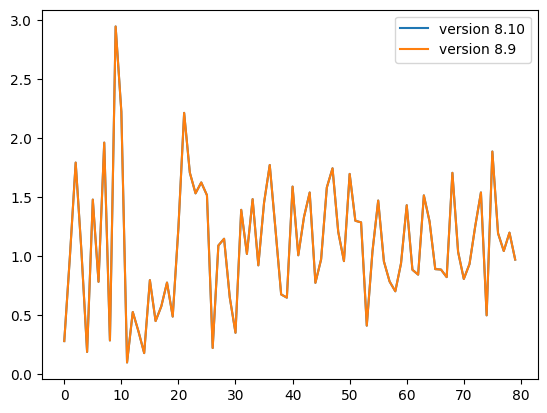

In [211]:
plt.plot(df_v08[(df_v08.version == 'run8.10') & (df_v08.tag == 'disc_loss')].step, 
         df_v08[(df_v08.version == 'run8.10') & (df_v08.tag == 'disc_loss')].value, 
            label="version 8.10")
plt.plot(df_v08[(df_v08.version == 'run8.10') & (df_v08.tag == 'disc_loss')].step, 
         df_v08[(df_v08.version == 'run8.10') & (df_v08.tag == 'disc_loss')].value, 
            label="version 8.9")
plt.legend()
plt.show()